# <h1 align="center"> ADY201 final project <h1/>

## GROUP: 
### Group member: Phạm Gia Bảo
### Group member: Phạm Thanh Sơn
### Group member: Đoàn Mạnh Cường
### Group member: Ngô Thế Khanh

# 1. Data selection & Understanding

In [448]:
import pandas as pd 
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np
from sklearn.preprocessing import StandardScaler

In [449]:
df = pd.read_csv("House_Rent_Dataset.csv")
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [450]:
original_df = df.copy() 

In [451]:
scaler_size = StandardScaler()
scaler_rent = StandardScaler()

# Fit và transform
df['Size'] = scaler_size.fit_transform(df[['Size']])
df['Rent'] = scaler_rent.fit_transform(df[['Rent']])

size_mean, size_std = scaler_size.mean_[0], scaler_size.scale_[0]
rent_mean, rent_std = scaler_rent.mean_[0], scaler_rent.scale_[0]


In [452]:
duplicates = df[df.duplicated(subset=df.columns.difference(['Post On', 'Rent']), keep=False)]

print(duplicates)
print("số lượng duplicates", len(duplicates))

       Posted On  BHK      Rent      Size       Floor    Area Type  \
2210  2022-05-19    2 -0.179178  0.208960  3 out of 4  Carpet Area   
2355  2022-05-19    2 -0.191982  0.208960  3 out of 4  Carpet Area   
2396  2022-06-04    2 -0.294417 -0.894905  2 out of 4  Carpet Area   
2424  2022-05-18    2 -0.243200 -0.500667  2 out of 4  Carpet Area   
2515  2022-06-04    1 -0.300819 -0.894905  2 out of 4  Carpet Area   
2542  2022-06-04    1 -0.307222 -0.894905  2 out of 4  Carpet Area   
2664  2022-06-18    3 -0.076743  1.312826  2 out of 4  Carpet Area   
2682  2022-06-18    3 -0.063938  1.312826  2 out of 4  Carpet Area   
2758  2022-06-04    2 -0.281613 -0.894905  2 out of 4  Carpet Area   
2851  2022-05-18    3 -0.140764  0.445503  2 out of 4  Carpet Area   
2910  2022-05-18    3 -0.153569  0.445503  2 out of 4  Carpet Area   
2925  2022-05-18    2 -0.223993 -0.500667  2 out of 4  Carpet Area   
4441  2022-07-06    3 -0.320026  0.208960  1 out of 4  Carpet Area   
4521  2022-07-06    

In [453]:
df.groupby('Area Locality')['Rent'].mean()

Area Locality
 Beeramguda, Ramachandra Puram, NH 9    2.112809
 in Boduppal, NH 2 2                   -0.387889
 in Erragadda, NH 9                    -0.294417
 in Miyapur, NH 9                      -0.256004
117 Residency, Chembur East             0.153737
                                          ...   
vanamali chs ghatla, Ghatla             0.217759
venkatapuram                           -0.275211
venkatesa perumal nagar                -0.332830
villvam towers tnhb colony             -0.256004
whitefield                              0.287649
Name: Rent, Length: 2235, dtype: float64

In [454]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4746 non-null   object 
 1   BHK                4746 non-null   int64  
 2   Rent               4746 non-null   float64
 3   Size               4746 non-null   float64
 4   Floor              4746 non-null   object 
 5   Area Type          4746 non-null   object 
 6   Area Locality      4746 non-null   object 
 7   City               4746 non-null   object 
 8   Furnishing Status  4746 non-null   object 
 9   Tenant Preferred   4746 non-null   object 
 10  Bathroom           4746 non-null   int64  
 11  Point of Contact   4746 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 445.1+ KB


# 2. Data preprocessing

In [455]:
# Xoá cột dư thừa
df.drop(columns=["Posted On"], inplace=True)
df.drop(columns=["Area Locality"], inplace=True)

In [456]:
# One-hot Encoding
df = pd.get_dummies(df, columns=['City', 'Tenant Preferred', 'Point of Contact'], drop_first=False)
df.columns = df.columns.str.replace(" ", "_").str.replace("/", "_")

In [457]:
# Ordinal Encoding
def encode_floor(value):
    if isinstance(value, str):
        v = value.lower()
        if "lower basement" in v:
            return -2
        elif "upper basement" in v:
            return -1
        elif "ground" in v:
            return 0
        elif v[0].isdigit():
            return int(v[0])
    return None

df['Floor'] = df['Floor'].apply(encode_floor)

area_mapping = {'Super Area': 0, 'Built Area': 1, 'Carpet Area': 2}
df['Area_Type'] = df['Area_Type'].map(area_mapping)

furnish_mapping = {'Unfurnished': 0, 'Semi-Furnished': 1, 'Furnished': 2}
df['Furnishing_Status'] = df['Furnishing_Status'].map(furnish_mapping)

In [458]:
# Xử lí ngoại lai
Q1 = df['Rent'].quantile(0.25)
Q3 = df['Rent'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [459]:
df_clean = df[(df['Rent'] >= lower_bound) & (df['Rent'] <= upper_bound)]


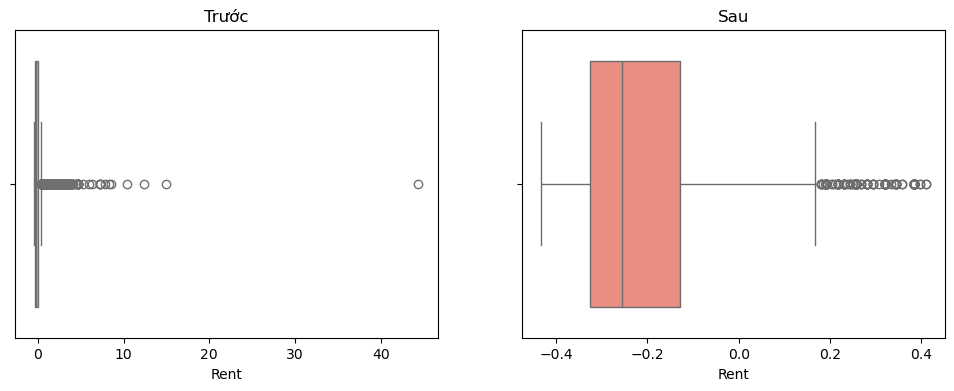

In [460]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.boxplot(x=df['Rent'], ax=axes[0], color='skyblue')
axes[0].set_title("Trước")

sns.boxplot(x=df_clean['Rent'], ax=axes[1], color='salmon')
axes[1].set_title("Sau")

plt.show()


In [482]:
df_clean

,BHK,Rent,Size,Floor,Area_Type,Furnishing_Status,Bathroom,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Tenant_Preferred_Bachelors,Tenant_Preferred_Bachelors_Family,Tenant_Preferred_Family,Point_of_Contact_Contact_Agent,Point_of_Contact_Contact_Builder,Point_of_Contact_Contact_Owner
0,2,-0.320026,0.208960,0,0,0,2,False,False,False,False,True,False,False,True,False,False,False,True
1,2,-0.191982,-0.264125,1,0,1,1,False,False,False,False,True,False,False,True,False,False,False,True
2,2,-0.230395,0.051265,1,0,1,1,False,False,False,False,True,False,False,True,False,False,False,True
3,2,-0.320026,-0.264125,1,0,0,1,False,False,False,False,True,False,False,True,False,False,False,True
4,2,-0.352037,-0.185277,1,2,0,1,False,False,False,False,True,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,-0.256004,0.051265,3,2,1,2,False,False,False,True,False,False,False,True,False,False,False,True
4742,3,-0.076743,1.628216,1,0,1,3,False,False,False,True,False,False,False,True,False,False,False,True
4743,3,0.000084,1.233978,3,2,1,3,False,False,False,True,False,False,False,True,False,True,False,False
4744,3,0.128128,0.839741,2,2,1,2,False,False,False,True,False,False,False,False,True,True,False,False


# 3. Data Visualization

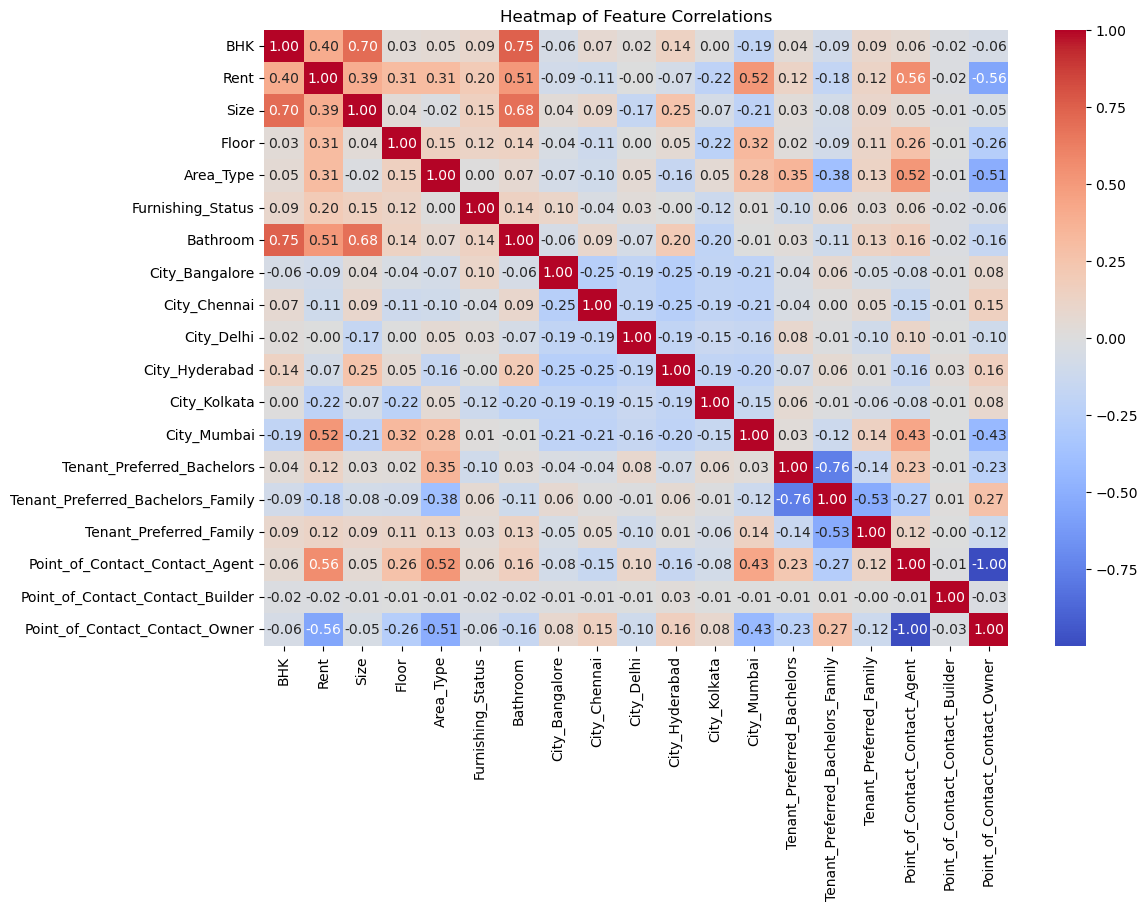

In [461]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_clean.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Feature Correlations")
plt.show()

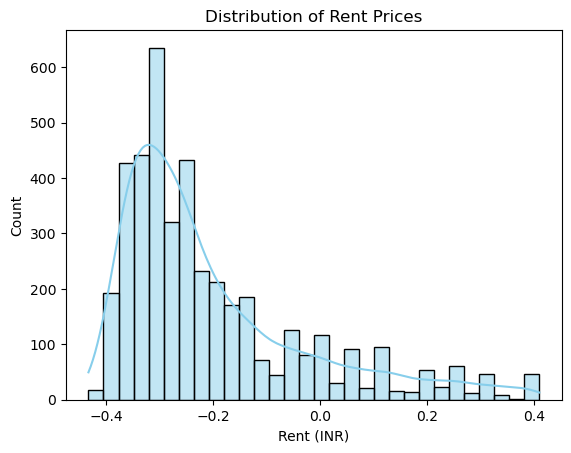

In [462]:
# Phân phối giá thuê
sns.histplot(df_clean['Rent'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Rent Prices')
plt.xlabel('Rent (INR)')
plt.show()

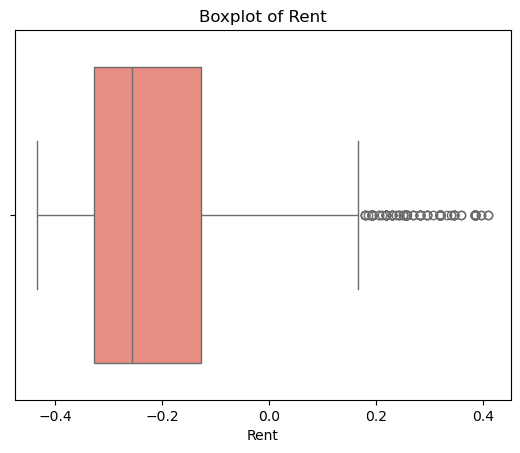

In [463]:
sns.boxplot(x=df_clean['Rent'], color='salmon')
plt.title('Boxplot of Rent')
plt.show()


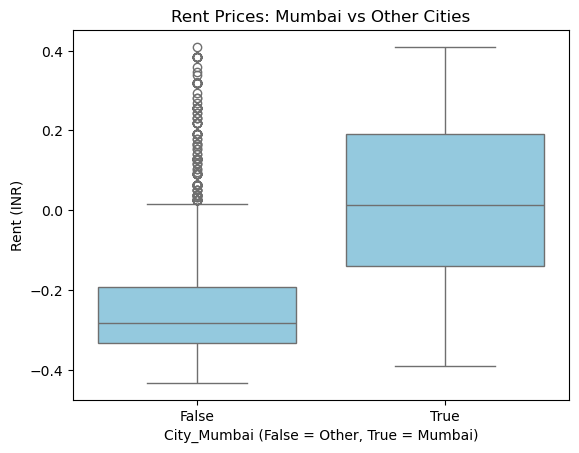

In [464]:
# So sánh giá thuê giữa Mumbai và các thành phố khác
sns.boxplot(data=df_clean, x='City_Mumbai', y='Rent', color='skyblue')
plt.title('Rent Prices: Mumbai vs Other Cities')
plt.xlabel('City_Mumbai (False = Other, True = Mumbai)')
plt.ylabel('Rent (INR)')
plt.show()

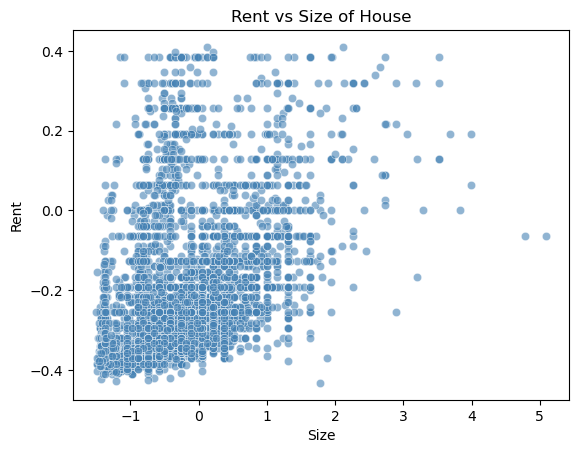

In [465]:
sns.scatterplot(data=df_clean, x='Size', y='Rent', alpha=0.6, color='steelblue')
plt.title('Rent vs Size of House')
plt.show()


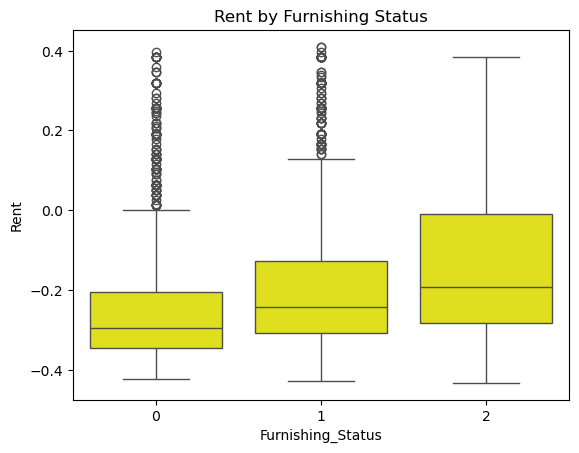

In [466]:
sns.boxplot(data=df_clean, x='Furnishing_Status', y='Rent', color='yellow')
plt.title('Rent by Furnishing Status')
plt.show()

C:\Users\GIA BAO\AppData\Local\Temp\ipykernel_7904\2494637639.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df_clean, x='Furnishing_Status', y='Rent', palette='Set2', jitter=True, alpha=0.6)


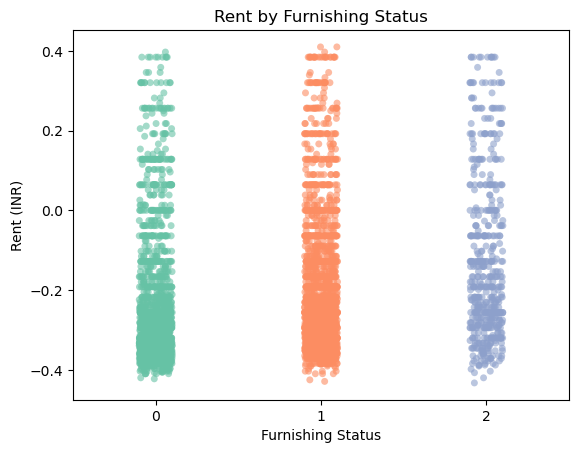

In [467]:
sns.stripplot(data=df_clean, x='Furnishing_Status', y='Rent', palette='Set2', jitter=True, alpha=0.6)
plt.title('Rent by Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Rent (INR)')
plt.show()

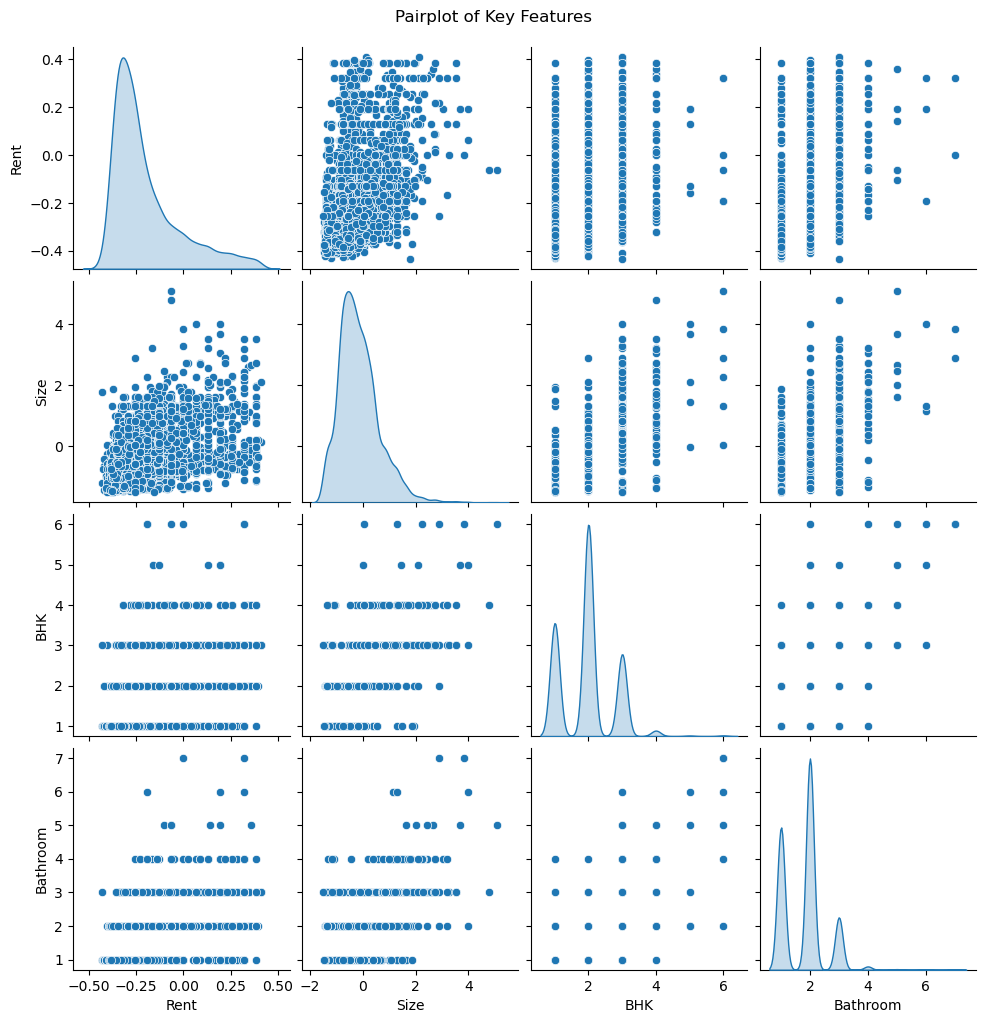

In [472]:
sns.pairplot(df_clean[['Rent', 'Size', 'BHK', 'Bathroom']], diag_kind='kde')
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()


C:\Users\GIA BAO\AppData\Local\Temp\ipykernel_7904\2725782572.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_clean, x='Point_of_Contact_Contact_Agent', y='Rent', palette='Set3')


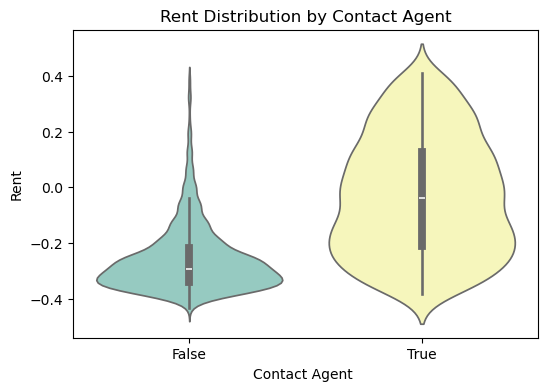

In [481]:
plt.figure(figsize=(6,4))
sns.violinplot(data=df_clean, x='Point_of_Contact_Contact_Agent', y='Rent', palette='Set3')
plt.title('Rent Distribution by Contact Agent')
plt.xlabel('Contact Agent ')
plt.ylabel('Rent')
plt.show()

# 4. Build Model

In [474]:
# Split train/test
df = df_clean.astype(float)

X = df.drop(columns=['Rent'])
y = df['Rent']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)


In [475]:
# Regression
models_reg = {
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=42),
    "RandomForestRegressor": RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
}

results_reg = []

for name, model in models_reg.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results_reg.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R²": r2
    })

df_results_reg = pd.DataFrame(results_reg)
print("📊 Kết quả đánh giá mô hình hồi quy:")
display(df_results_reg.sort_values(by="R²", ascending=False))


📊 Kết quả đánh giá mô hình hồi quy:


,Model,MAE,RMSE,R²
2,RandomForestRegressor,0.063493,0.095567,0.709474
0,LinearRegression,0.070952,0.099145,0.687314
1,DecisionTreeRegressor,0.083258,0.124362,0.508030


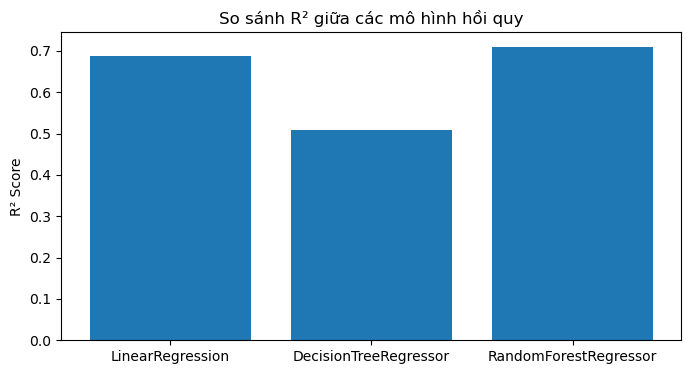

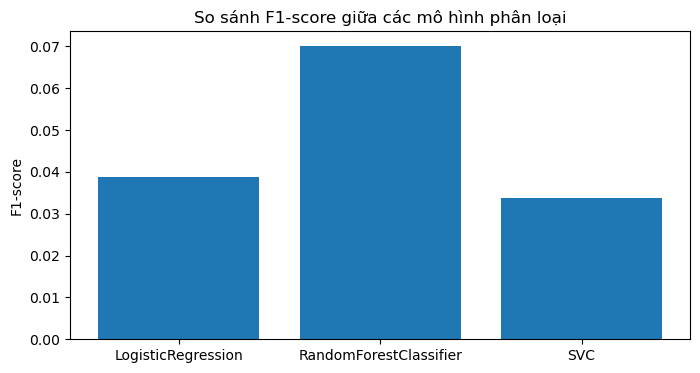

In [476]:
plt.figure(figsize=(8,4))
plt.bar(df_results_reg['Model'], df_results_reg['R²'])
plt.title("So sánh R² giữa các mô hình hồi quy")
plt.ylabel("R² Score")
plt.show()

plt.figure(figsize=(8,4))
plt.bar(df_results_cls['Model'], df_results_cls['F1-score'])
plt.title("So sánh F1-score giữa các mô hình phân loại")
plt.ylabel("F1-score")
plt.show()

In [477]:
#RandomForest
rf_model = RandomForestRegressor(
    n_estimators=200,   
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [478]:
rf_pred = rf_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest Results:")
print("MAE :", round(rf_mae, 2))
print("RMSE:", round(rf_rmse, 2))
print("R²  :", round(rf_r2, 3))

Random Forest Results:
MAE : 0.06
RMSE: 0.1
R²  : 0.709


In [479]:
def predict_rent(model, size_mean, size_std, rent_mean, rent_std):
    print("=== DỰ ĐOÁN GIÁ THUÊ CĂN HỘ ===\n")

    BHK = int(input("Số phòng ngủ (BHK): ") or 2)
    Size = int(input("Diện tích (sqft): ") or 1000)
    Floor = int(input("Tầng số (Floor): ") or 2)
    Area_Type = int(input("Loại diện tích (0: Super, 1: Built, 2: Carpet): ") or 1)
    Furnishing_Status = int(input("Tình trạng nội thất (0: Unfurnished, 1: Semi, 2: Fully): ") or 1)
    Bathroom = int(input("Số phòng tắm: ") or 2)

    cities = ['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai']
    print("\nChọn thành phố:")
    for i, c in enumerate(cities):
        print(f"{i}. {c}")
    city_idx = int(input("Nhập số tương ứng: ") or 0)
    city_data = [1 if i == city_idx else 0 for i in range(len(cities))]

    tenants = ['Preferred_Bachelors', 'Preferred_Bachelors_Family', 'Preferred_Family']
    print("\nChọn loại người thuê:")
    for i, t in enumerate(tenants):
        print(f"{i}. {t.replace('Preferred_', '')}")
    tenant_idx = int(input("Nhập số tương ứng: ") or 0)
    tenant_data = [1 if i == tenant_idx else 0 for i in range(len(tenants))]

    contacts = ['Contact_Agent', 'Contact_Builder', 'Contact_Owner']
    print("\nChọn người liên hệ:")
    for i, c in enumerate(contacts):
        print(f"{i}. {c.replace('Contact_', '')}")
    contact_idx = int(input("Nhập số tương ứng: ") or 0)
    contact_data = [1 if i == contact_idx else 0 for i in range(len(contacts))]

    Size_scaled = (Size - size_mean) / size_std

    input_data = np.array([[
        BHK, Size_scaled, Floor, Area_Type, Furnishing_Status, Bathroom
    ] + city_data + tenant_data + contact_data])

    cols = ['BHK', 'Size', 'Floor', 'Area_Type', 'Furnishing_Status', 'Bathroom'] + \
           [f'City_{c}' for c in cities] + \
           [f'Tenant_{t}' for t in tenants] + \
           [f'Point_of_Contact_{c}' for c in contacts]

    df_input = pd.DataFrame(input_data, columns=cols)

    rent_pred_scaled = model.predict(df_input)[0]

    rent_pred_real = rent_pred_scaled * rent_std + rent_mean

    print(f"\n💰 Giá thuê dự đoán: {rent_pred_real:,.0f} rupee/tháng")


In [483]:
predict_rent(rf_model, size_mean, size_std, rent_mean, rent_std)

=== DỰ ĐOÁN GIÁ THUÊ CĂN HỘ ===



Số phòng ngủ (BHK):  2
Diện tích (sqft):  1500
Tầng số (Floor):  2
Loại diện tích (0: Super, 1: Built, 2: Carpet):  2
Tình trạng nội thất (0: Unfurnished, 1: Semi, 2: Fully):  2
Số phòng tắm:  2



Chọn thành phố:
0. Bangalore
1. Chennai
2. Delhi
3. Hyderabad
4. Kolkata
5. Mumbai


Nhập số tương ứng:  2



Chọn loại người thuê:
0. Bachelors
1. Bachelors_Family
2. Family


Nhập số tương ứng:  2



Chọn người liên hệ:
0. Agent
1. Builder
2. Owner


Nhập số tương ứng:  2



💰 Giá thuê dự đoán: 30,095 rupee/tháng
